# Reference:
https://pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/

In [8]:
import numpy as np
import cv2
import imutils
from scipy.spatial import distance
from matplotlib import pyplot as plt

In [9]:
def order_points(points: np.ndarray):
    # initialize 4 points
    # top left, top right, bottom right, bottom left
    rect = np.zeros((4,2), dtype='float32')
    
    # get the top left and bottom right
    s = points.sum(axis=1)
    rect[0] = points[np.argmin(s)]
    rect[2] = points[np.argmax(s)]
    
    # get the top right and bottom left
    diff = np.diff(points, axis=1)
    rect[1] = points[np.argmin(diff)]
    rect[3] = points[np.argmax(diff)]
    
    return rect

In [10]:
def four_point_transform(image, points):
    rect = order_points(points)
    tl, tr, br, bl = rect
    
    width_a = distance.euclidean(tl, tr)
    width_b = distance.euclidean(bl, br)
    
    # Manhattan distance
    # width_a = np.abs(tl[0] - tr[0])
    # width_b = np.abs(bl[0] - br[0])
    max_width = max(int(width_a), int(width_b))
    
    height_a = distance.euclidean(tl, bl)
    height_b = distance.euclidean(tr, br)
    
    # Manhattan distance
    # height_a = np.abs(tl[1] - bl[1])
    # height_b = np.abs(tr[1] - br[1])
    max_height = max(int(height_a), int(height_b))
    
    # open cv image coordinate system is start from top(0,0) to down
    dst = np.array([
        [0,0],
        [max_width - 1, 0],
        [max_width - 1, max_height - 1],
        [0, max_height - 1]
    ], dtype='float32')
    
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (max_width, max_height))
    
    return warped

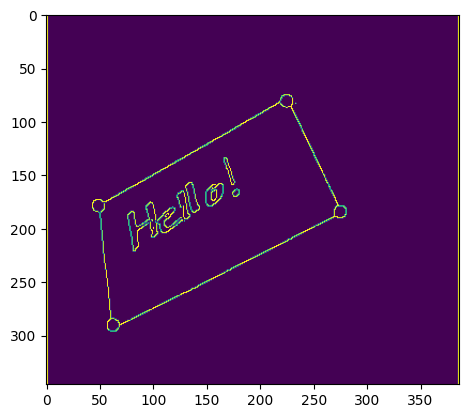

In [11]:
image = cv2.imread('../resources/transform_sample2.jpg')
edged = cv2.Canny(image, 50, 100)
plt.imshow(edged)


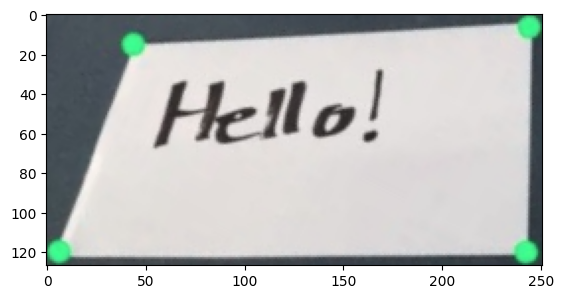

In [12]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
for c in cnts:
    if cv2.contourArea(c) < 1000:
        continue
    
    box = cv2.minAreaRect(c)
    box = cv2.boxPoints(box)

    points = np.array(box)
    warped = four_point_transform(image, points)

    plt.figure()
    plt.imshow(warped)
    plt.show()